In [28]:
import numpy, pandas as pd, matplotlib.pyplot as plt

In [29]:
pop_dis = pd.read_csv("population_distribution.csv")

In [30]:
pop_dis.head()

,TIME,GEO,AGE,SEX,Value,Flag and Footnotes
0,2009,"European Union (EU6-1958, EU9-1973, EU10-1981,...",18 years or over,Total,:,NaN
1,2009,European Union - 28 countries,18 years or over,Total,:,NaN
2,2009,European Union - 27 countries (2007-2013),18 years or over,Total,80.8,NaN
3,2009,"Euro area (EA11-2000, EA12-2006, EA13-2007, EA...",18 years or over,Total,:,NaN
4,2009,Euro area (19 countries),18 years or over,Total,81.2,NaN


In [31]:
pop_dis_esp = pop_dis[pop_dis['GEO'] == 'Spain']

In [32]:
pop_dis_esp.head()

,TIME,GEO,AGE,SEX,Value,Flag and Footnotes
14,2009,Spain,18 years or over,Total,82.1,b
54,2010,Spain,18 years or over,Total,82.0,NaN
94,2011,Spain,18 years or over,Total,82.1,NaN
134,2012,Spain,18 years or over,Total,81.9,NaN
174,2013,Spain,18 years or over,Total,81.9,NaN


In [33]:
pop_dis_esp.shape

(10, 6)

In [34]:
pop_dis_esp.AGE

14     18 years or over
54     18 years or over
94     18 years or over
134    18 years or over
174    18 years or over
214    18 years or over
254    18 years or over
294    18 years or over
334    18 years or over
374    18 years or over
Name: AGE, dtype: object

In [35]:
pov_risk = pd.read_csv("poverty_risk.csv")

In [36]:
pov_es = pov_risk[pov_risk["GEO"] == 'Spain']

In [37]:
pov_es = pov_es[pov_es['UNIT'] == 'Thousand persons']

In [38]:
pov_es_male = pov_es[pov_es['SEX'] == 'Males']
pov_es_male = pov_es_male[pov_es_male['AGE'] == 'Total']

pov_es_fem = pov_es[pov_es['SEX'] == 'Females']
pov_es_fem = pov_es_fem[pov_es_fem['AGE'] == 'Total']


pov_es_tot = pov_es[pov_es['SEX'] == 'Total']
pov_es_tot = pov_es_tot[pov_es_tot['AGE'] == 'Total']


In [39]:
y_m = pov_es_male.Value
y_m = y_m.str.replace(" ", "").astype(int)

y_f = pov_es_fem.Value
y_f = y_f.str.replace(" ", "").astype(int)

y_t = pov_es_tot.Value
y_t = y_t.str.replace(" ", "").astype(int)

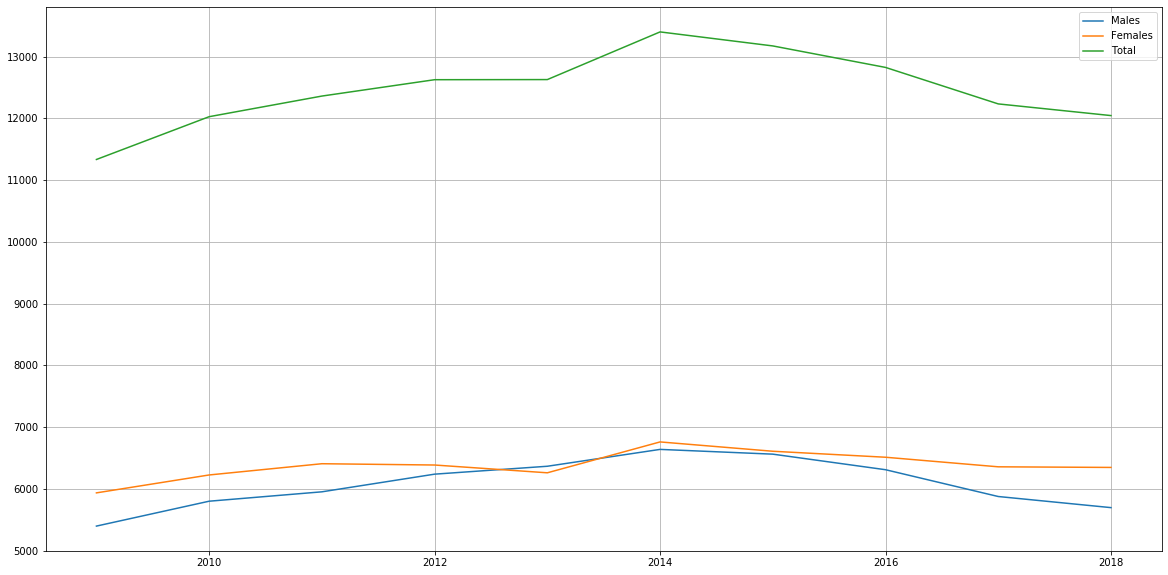

In [40]:
plt.figure(figsize=(20, 10))
plt.plot(pov_es_male.TIME, y_m, pov_es_fem.TIME, y_f, pov_es_tot.TIME, y_t)
plt.legend(['Males', 'Females', 'Total'])
plt.grid(True)


In [41]:
pov_es.head()

,TIME,GEO,UNIT,AGE,SEX,Value,Flag and Footnotes
645,2009,Spain,Thousand persons,Total,Total,11 336,NaN
646,2009,Spain,Thousand persons,Total,Males,5 399,NaN
647,2009,Spain,Thousand persons,Total,Females,5 937,NaN
648,2009,Spain,Thousand persons,Less than 16 years,Total,2 323,NaN
649,2009,Spain,Thousand persons,Less than 16 years,Males,1 219,NaN


In [42]:
pov_es.AGE.drop_duplicates()

645                  Total
648     Less than 16 years
651    From 16 to 24 years
654    From 25 to 54 years
657       55 years or over
Name: AGE, dtype: object

In [43]:
pov_es.Value = pov_es.Value.str.replace(" ", "")

In [44]:
pov_es.Value = pd.to_numeric(pov_es.Value)

In [45]:
values_per_age = pov_es[['AGE', 'Value']].groupby('AGE').sum()
values_per_age

,Value
AGE,
55 years or over,56181
From 16 to 24 years,29585
From 25 to 54 years,116036
Less than 16 years,47547
Total,249347


In [46]:
values_per_age = values_per_age.drop(['Total'])

values_per_age = values_per_age.reindex(index=values_per_age.index[::-1])

<BarContainer object of 4 artists>

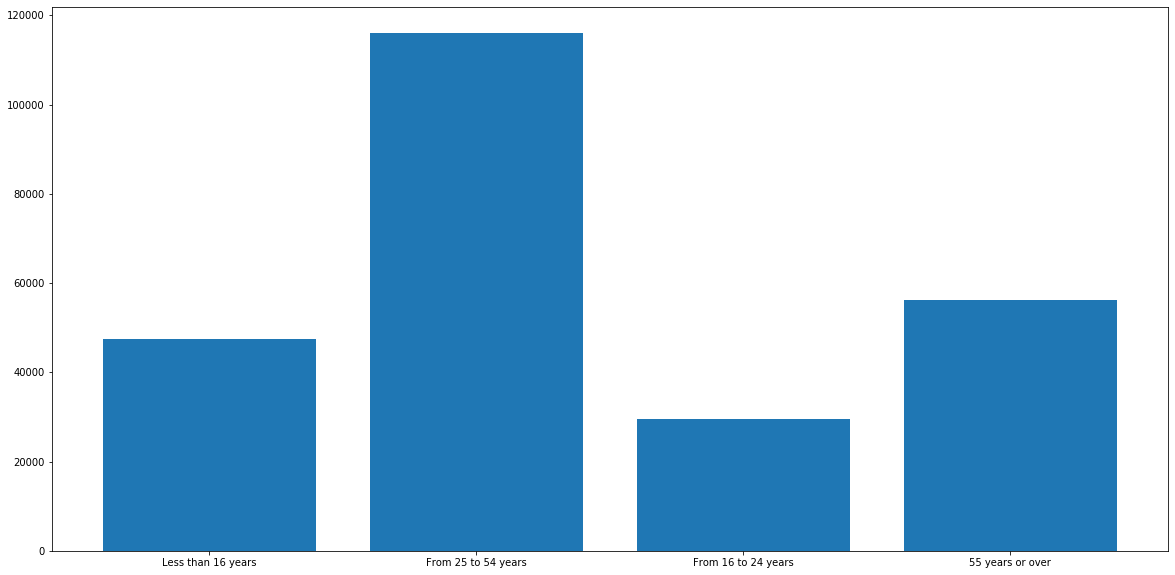

In [47]:
plt.figure(figsize=(20, 10))
plt.bar(values_per_age.index, height=values_per_age.Value)

In [50]:
from lightning import Lightning

ModuleNotFoundError: No module named 'lightning'